# 实验五：层次聚类

#### 姓名：任薏霖 
#### 学号：2011897
#### 专业：物联网工程

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
clusterNum = []
dest = 0
src = 0
MAX_NUM = 1e3

### 初级要求

In [3]:
def singleLinkage(X):
    clusters = []
    for i in range(len(X[0])):
        clusters.append(min(X[0][i], X[1][i]));
    return clusters

In [4]:
def completeLinkage(X):
    clusters = []
    for i in range(len(X[0])):
        clusters.append(max(X[0][i], X[1][i]));
    return clusters

### 中级要求

In [5]:
def averageLinkage(X):
    clusters = []
    for i in range(len(X[0])):
        clusters.append((clusterNum[dest] * X[0][i] + clusterNum[src] * X[1][i]) / (clusterNum[dest] + clusterNum[src]))
    return clusters

In [6]:
def create_data(centers,num=100,std=0.7):
    '''
    生成用于聚类的数据集
    :param centers: 聚类的中心点组成的数组。如果中心点是二维的，则产生的每个样本都是二维的。
    :param num: 样本数
    :param std: 每个簇中样本的标准差
    :return: 用于聚类的数据集。是一个元组，第一个元素为样本集，第二个元素为样本集的真实簇分类标记
    '''
    X, labels_true = make_blobs(n_samples = num, centers = centers, cluster_std = std)
    return X, labels_true

In [7]:
def plot_data(*data):
    '''
    绘制用于聚类的数据集
    :param data: 可变参数。它是一个元组。元组元素依次为：第一个元素为样本集，第二个元素为样本集的真实簇分类标记，第三个元素为预测分类标记
    :return: None
    '''
    X, labels_true, labels_predict, cnt = data
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    colors = 'rgbyckm' # 每个簇的样本标记不同的颜色
    markers = 'o^sP*DX'
    for i in range(len(labels_true)):
        predict = labels_predict[i]
        ax.scatter(X[i, 0], X[i, 1], label = "cluster %d" % labels_true[i], 
                   color = colors[predict % len(colors)], marker = markers[labels_true[i] % len(markers)], alpha=0.5)

In [8]:
class AgglomerativeClustering:
    def __init__(self):
        # 对每次的合并进行记录
        self.steps=[]

    def fit(self, datas, method):
        self.dataCnt = datas.shape[0]
        global clusterNum
        global dest
        global src
        # 预处理各点之间的距离
        allDist = np.zeros((self.dataCnt,self.dataCnt))
        for i in range(self.dataCnt):
            for j in range(i):
                allDist[i][j] = allDist[j][i] = np.sum((datas[i] - datas[j]) ** 2)
        setList, clusterCount = [[i] for i in range(self.dataCnt)], self.dataCnt
        print("calculate distance finish!")

        # 聚类间距离矩阵
        clusterDist = np.zeros((self.dataCnt,self.dataCnt)) + MAX_NUM
        clusterNum = np.zeros(2000)
        
        for i in range(clusterCount):
            clusterNum[i] = 1
            for j in range(i + 1,clusterCount):
                clusterDist[i][j] = clusterDist[j][i] = allDist[i][j]
        print("calculate cluster distance finish!")

        while clusterCount != 1:
            # 最相似的两个聚类
            res = np.argmin(clusterDist)
            dest, src = int(res / clusterCount), res % clusterCount
            # steps进行一次记录
            self.steps.append((setList[dest][0], setList[src][0]))
            # 聚类间距离矩阵更新
            modify = method(clusterDist[[dest, src]])
            clusterDist[dest] = modify
            clusterDist[:,dest] = modify
            clusterDist = np.delete(clusterDist, src, axis = 0)
            clusterDist = np.delete(clusterDist, src, axis = 1)
            clusterDist[dest][dest] = MAX_NUM
            #权重更新
            clusterNum[dest] += clusterNum[src]
            clusterNum = np.delete(clusterNum, src)
            # 聚类更新
            setList[dest] = setList[dest] + setList[src]
            del setList[src]
            clusterCount -= 1
            if (self.dataCnt - clusterCount) % (self.dataCnt / 20) == 0:
                print(clusterCount, " clusters left.")

        print("cluster finish !")

    def label(self, k):
        root = list(range(self.dataCnt))
        def find_root(n):
            if root[root[n]] == root[n]:
                return root[n]
            root[n] = find_root(root[n])
            return root[n]
        for i in range(self.dataCnt - k): # 根据steps记录产生非连通图
            src,dest = self.steps[i]
            root[find_root(dest)] = find_root(src)
        cluster, clusterNum = [0 for i in range(self.dataCnt)], 0
        for i in range(self.dataCnt): # 将根节点标注为新的cluster
            if i == root[i]: # i是根
                clusterNum += 1
                cluster[i] = clusterNum
        for i in range(self.dataCnt): # 将非根节点标注为根节点的cluster
            if i != root[i]: # i不是根
                cluster[i] = cluster[find_root(i)]
        return cluster

In [9]:
centers = [[1, 1, 1], [1, 3, 3], [3, 6, 5], [2, 6, 8]]# 用于产生聚类的中心点, 聚类中心的维度代表产生样本的维度
X, labels_true = create_data(centers, 2000, 0.5) # 产生用于聚类的数据集，聚类中心点的个数代表类别数
np.savetxt('data.dat', X)
np.savetxt('label.dat', labels_true)
print("generate data finish!")

generate data finish!


calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculat

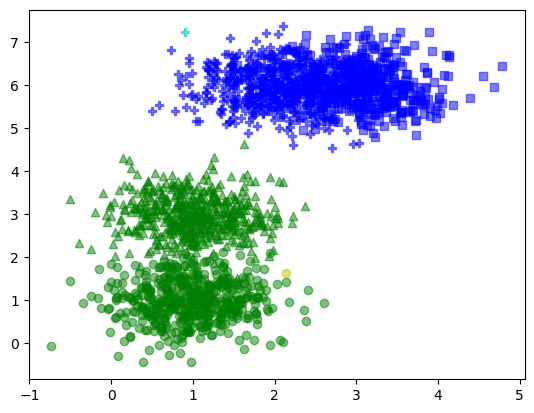

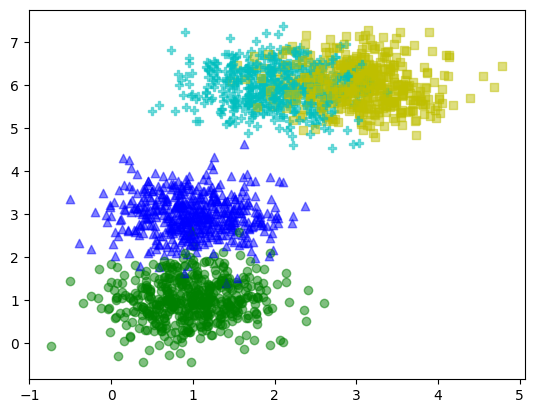

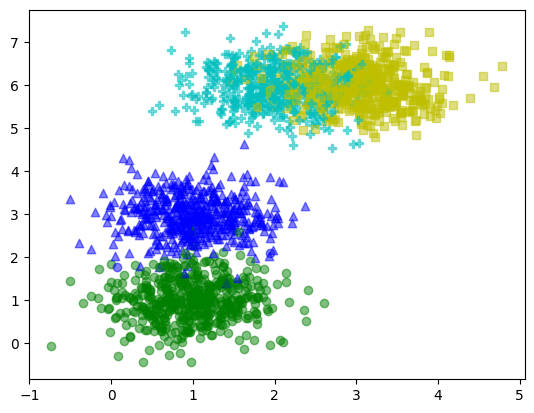

In [10]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]

cnt = 0
for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(X, method)
    k = 4
    plot_data(X, labels_true, model.label(k), cnt)
    cnt += 1
    print("-------Segmentation-------")

### 高级要求

In [11]:
cluster_Num = [2, 4, 6]

#### 分别对各种算法以不同的分类簇对其准确率进行衡量

calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculat

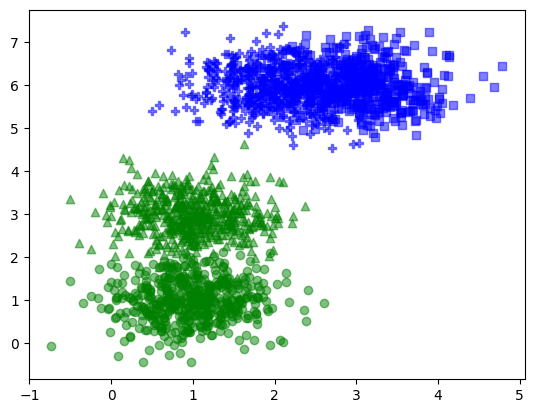

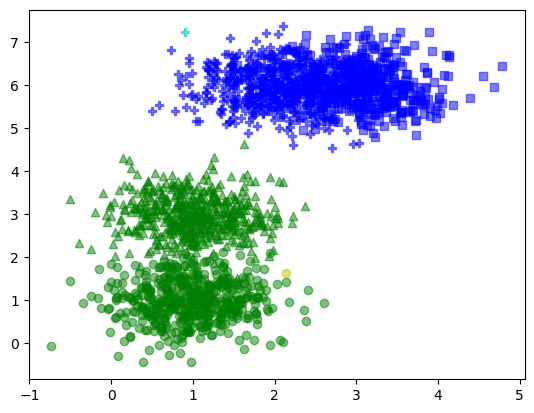

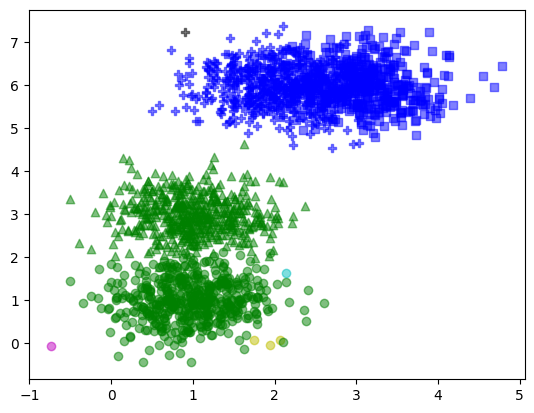

In [12]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]

cnt = 0
for i in cluster_Num:
    model = AgglomerativeClustering()
    model.fit(X, singleLinkage)
    k = i
    plot_data(X, labels_true, model.label(k), cnt)
    cnt += 1
    print("-------Segmentation-------")

针对singleLinkage算法，分类簇增加导致部分类别分类区分不明显，类间距离较小，错误率较高。

calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculat

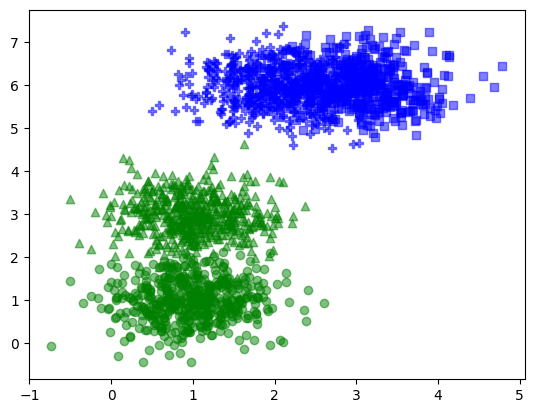

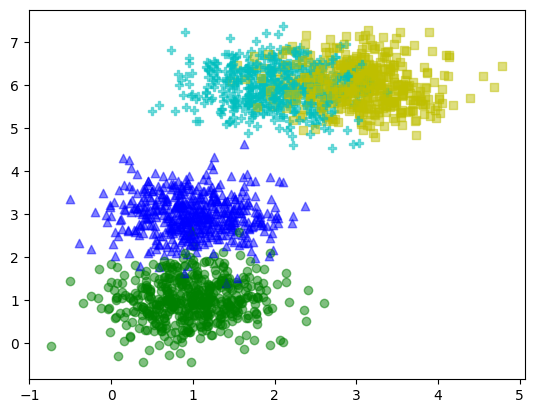

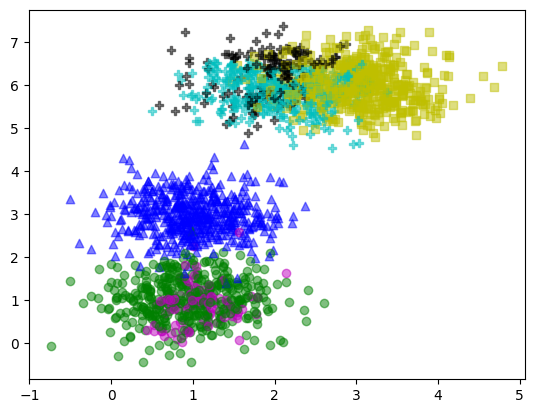

In [13]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]

cnt = 0
for i in cluster_Num:
    model = AgglomerativeClustering()
    model.fit(X, completeLinkage)
    k = i
    plot_data(X, labels_true, model.label(k), cnt)
    cnt += 1
    print("-------Segmentation-------")

针对completeLinkage算法，分类簇越多错误率越大，但当分类簇为2和4时，可以保持较高的准确率，而当分类簇为6时，部分类别之间分类不清晰。

calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculat

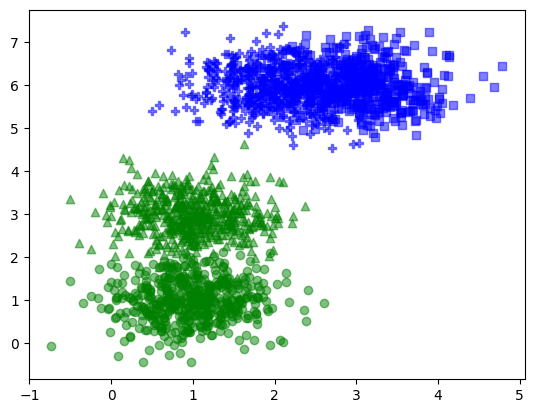

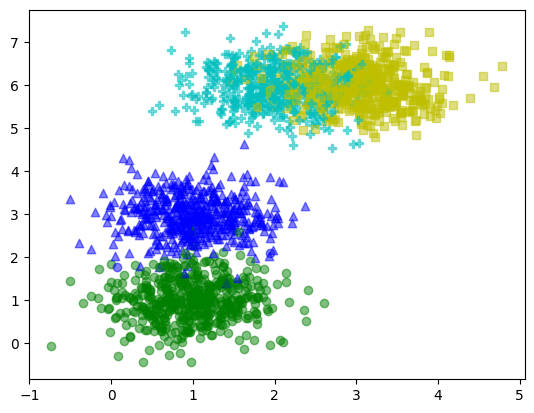

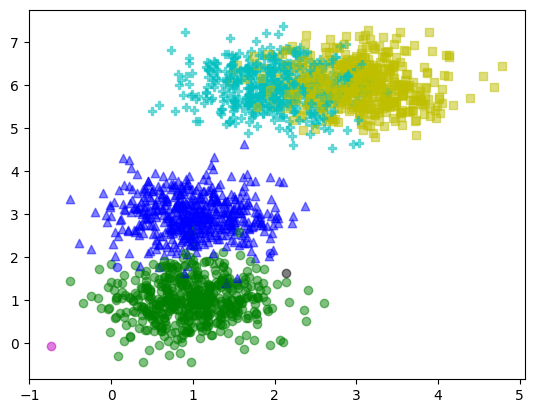

In [14]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]

cnt = 0
for i in cluster_Num:
    model = AgglomerativeClustering()
    model.fit(X, averageLinkage)
    k = i
    plot_data(X, labels_true, model.label(k), cnt)
    cnt += 1
    print("-------Segmentation-------")

averagelinkage算法性能较好

#### 分别对不同算法，以相同的分类簇数量进行算法性能评定

calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculat

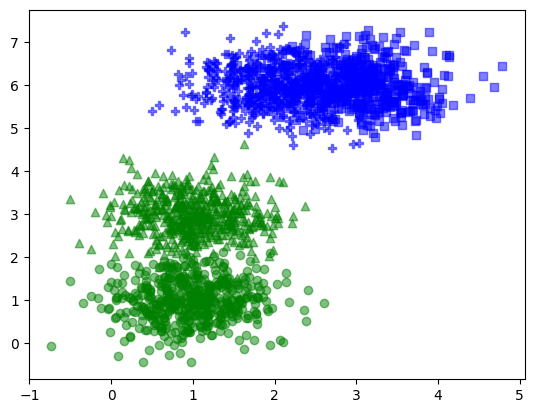

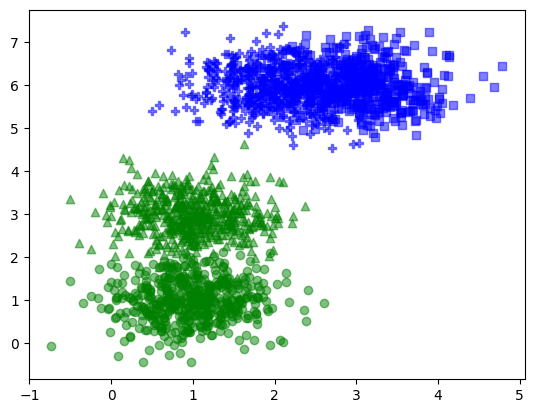

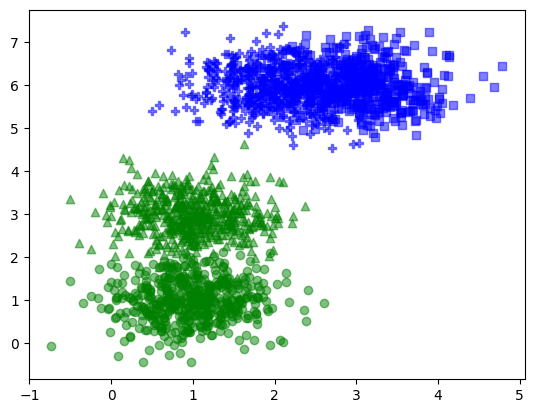

In [15]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]

cnt = 0
for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(X, method)
    k = 2
    plot_data(X, labels_true, model.label(k), cnt)
    cnt += 1
    print("-------Segmentation-------")

calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
-------Segmentation-------
calculat

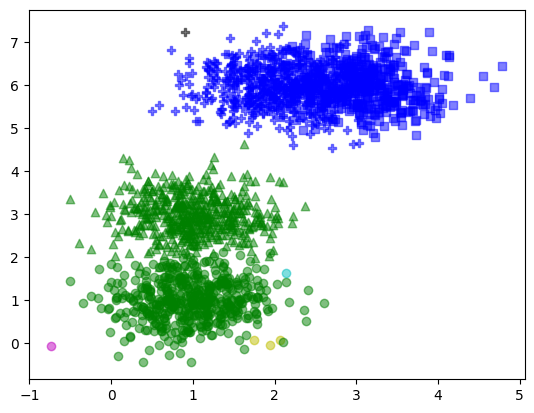

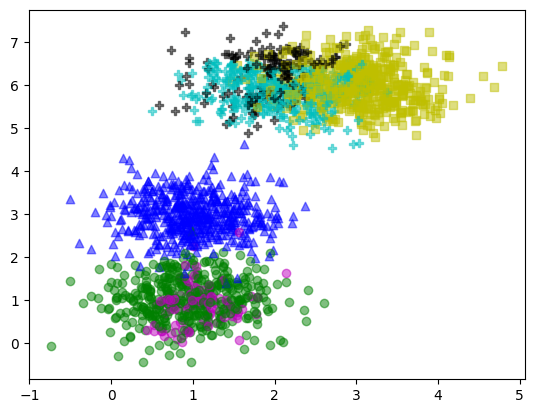

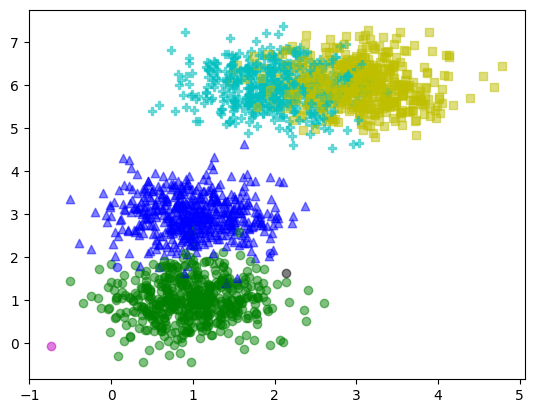

In [16]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]

cnt = 0
for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(X, method)
    k = 6
    plot_data(X, labels_true, model.label(k), cnt)
    cnt += 1
    print("-------Segmentation-------")

    总结：当分类簇数量增加时，averangelinkage算法结果要优于另外两种算法，另外single和complete更适用于分类簇较少，分类种类较少的数量集，此时准确率会较高。而当数据集越来越复杂时，建议使用averangelinkable算法进行分类